<a href="https://colab.research.google.com/github/tharina11/Deep-Learning-Exercises/blob/main/ANN_for_structured_imbalanced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Customer Churn Prediction with ANN**

Customer churn is a quantitative measure of the customers who stopped purchasing business products of a company during a particular period of time. In this situation, businesses are curious to know why customers left a the business, so that they can fix the issues and imporve their business for a better customer retaining rate.

For this project I have followed this [video](https://www.youtube.com/watch?v=MSBY28IJ47U&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=18) from Codebasics youtube channel. I have referred several online sources to explore deeper and understand the workflow. All the resources used are cited at the end of this code.

The input data set is downloaded from [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) website. The dataset consists of data about customers of the company over a month. Churn = Yes is that customer left the company during the month.


Following Python libraries are used in the project for each task mentioned.

- Numpy, Pandas: Clean and organize input data
- Matplotlib, Seaborn : Visualize data 
- Tensorflow, Keras API: Bulid and execute neural network
- skleran: Organize data and classification results generation
- SMOTE : Handle imbalance data

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [2]:
# Mount google drive and authenticate
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# import data into a dataframe from google drive
df = pd.read_csv('/content/drive/MyDrive/Deep Learning/Codebasics/customer_churn.csv')

In [4]:
# View first 5 rows of data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Customer ID is a unique identifier for each customer in ths dataset, but for in this project, our target variable is Churn (customer stoppend business or not). In that case, customer ID does not provide useful information. So we can drop that column.

Let's explore the data type of each column of the dataframe. Then we will clean and organize data to provide as input.

In [5]:
# Drop customerID column
df.drop('customerID', axis='columns', inplace = True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

There are numerical (int64, and float64) columns, and categorical (object) columns. The MonthyCharge is a number in the dataframe, but the datatype is 'object'. This column needs to be converted to a numerical data type. Let's use pandas to_numeric function to do this. There are some empty cells in the column, so we can use the 'error = coerce' parameter as an exception to to ignore the errors can occur due to empty cells. 

In [6]:
 # There are empty cells. Ignore errors raised by those cells
pd.to_numeric(df.TotalCharges, errors = 'coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

Select the rows where the TotalCharges is zero, and use it as an index in the original dataframe.

In [7]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
# View shape of the inital dataframe
df.shape

(7043, 20)

In [9]:
# View the TotalCharges value of the first row where TotalCharges column is empty (a validation)
df.iloc[488]['TotalCharges']

' '

There are 11 rows that have null values for TotalCharges column. We can drop those 11 rows as it is a small values compared to 7043 rows.

In [10]:
# Create a new dataframe without the above 11 rows
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [11]:
# Check the datatypes of new columns 
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
# Empty rows are dropped. Change the datatype of TotalCharges column
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

<ipython-input-12-bd9d45fcc082>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [13]:
# Check the updated data types of the columns
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Let's visualize data to understand customer churn with respect to the time they have been with the company. The column 'tenure' is useful for this taks, which represents the number of months the customer stayed with the company.

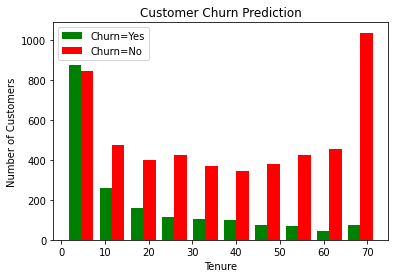

In [14]:
# Visualize customer churn against tenure
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction')

plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

The graph show's that the number of customers who are leaving the company (in green) is getting reduced with increasing number of months they stayed with the company. About 1000 customers who stayed with the company for 70 months are not leaving.

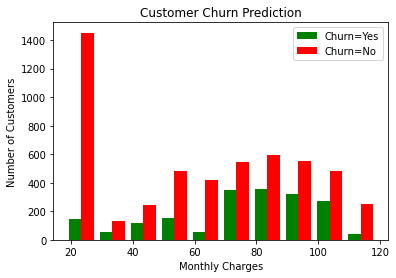

In [15]:
# Visualize customer churn against monthly charge
tenure_churn_no = df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction')

plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

Customers with lowest monthly charge stays did not leave the company during the considered month and both churn = Yes and churn = No data show a distribution somewhat close to a normal distribution.

Next, because the dataset consists of several categorical features, we have to transform to a format that can be used in a classification model. We can use one hot encoding for that. First, we will explore the feature and understand the data deeper.

In [16]:
# Function to find unique values for each column where the data type is object
def print_unique_col_values(df):
  for column in df:
    if df[column].dtype == 'object':
      print(f'{column} : {df[column].unique()}')

In [17]:
# View unique values of the columns
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


There are multiple answers recorded for 'No'. Let's replace the similar answers with 'No' which would make one-hot encoding easier.

In [18]:
df1.replace('No internet service', 'No', inplace = True)
df1.replace('No phone service', 'No', inplace = True)

<ipython-input-18-4504976d21a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace = True)
<ipython-input-18-4504976d21a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace = True)


One hot encode the columns with binary responses using a for loop.

First we can replace columns with yes and no with 1 and 0 respectively.

In [19]:
# One hot encoding
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

# Replace values inplace
for col in yes_no_columns:
  df1[col].replace({'Yes': 1, 'No': 0}, inplace= True)

<ipython-input-19-65f9ce2ad926>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1, 'No': 0}, inplace= True)


In [20]:
# Print unique values of each column
for col in df1:
  print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


Next, replace female and male with 1 and 0 respectively.

In [21]:
# One hot encode gender column
df1['gender'].replace({'Female':1, 'Male':0}, inplace= True)

<ipython-input-21-aad221b4b9c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1, 'Male':0}, inplace= True)


In [22]:
# validate updating of the gender column
df1['gender'].unique()

array([1, 0])

Since there are more than two responses in the categorical features, we can use pandas get_dummies function to apply one hot encoding.

In [23]:
# One hot encode the remaining columns and create a new dataframe with 1 and 0 values 
df2 = pd.get_dummies(data= df1, columns = ['InternetService', 'Contract', 'PaymentMethod'])

In [24]:
# View column names of the new dataframe
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [25]:
# View top four rows of the dataframe
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
771,0,0,0,0,15,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
6178,1,1,1,0,54,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
6323,1,0,0,0,40,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
5507,1,0,0,0,28,1,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0


In [26]:
# View data types of the new dataframe
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

It is important to have all the input features in the same range to make the convergence of gradient descent faster. If we have different ranges among input fetures, weighted sums will be affected more with the data in large ranges. So the neural network has to do more work to tune the parameters to get the least error in training.

MinMaxScaler will transform our data into the range between 0 and 1 considering the smallest value as 0 and largest value as 1.

In [27]:
# Scale the three columns with large range to the range between 0 and 1
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [28]:
# View unique values of updated data of each column in the dataframe
for col in df2:
  print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [29]:
# Divide data into independent variables (x) and dependent variable (y)
x = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [30]:
# Split data into training and testing data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [31]:
# Shape of the training independent variables
x_train.shape

(5625, 26)

In [32]:
x_test.shape

(1407, 26)

In [33]:
# View first 10 rows of the training independent variables
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


Now the data preparation is completed, we can build, complie, and fit the neural network.

We will build a three layer neural network. 

- In first layer, number of neurons are set to 26, because the number of input features are 26
- Number of neurons in the second layer is set to 20 (no special reason, should be determined through trial and error). Activation function is set to relu, because generally it performs better than other activation functions

- Output layer has only one neuron and sigmoid activation function is applied, since this is a binary classification

- Adam optimizer is used to let the gradient descent adapt its magnitude based on first and second moments (mean and variance) of gradient of the loss function

- Bianry cross entropy is used as the loss function ,because this is a classsificaiton problem

- Accuracy is used as the metric to evaluate the model after each epoch 

Only 5 epochs are used because this is to explore how to work with imbalance data.

In [34]:
# Build, compile, and fit the model
model = keras.Sequential([
    keras.layers.Dense(20, input_shape= (26,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics= ['accuracy'])

model.fit(x_train, y_train, epochs= 5)

Epoch 1/5
176/176 [==============================] - 6s 4ms/step - loss: 0.5421 - accuracy: 0.7221
Epoch 2/5
176/176 [==============================] - 1s 4ms/step - loss: 0.4426 - accuracy: 0.7852
Epoch 3/5
176/176 [==============================] - 1s 4ms/step - loss: 0.4257 - accuracy: 0.7963
Epoch 4/5
176/176 [==============================] - 1s 4ms/step - loss: 0.4198 - accuracy: 0.8014
Epoch 5/5
176/176 [==============================] - 1s 3ms/step - loss: 0.4172 - accuracy: 0.8028


In [35]:
# Evaluate the model using test data
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.7918


[0.4433242082595825, 0.7917554974555969]

The model resulted in accuracy of 0.80 with training and 0.79 accuracy with testing data. Therefore the model is generalized well with training and testing data.

In [36]:
# Predict first 10 entries of testing data using the model 
y_predict = model.predict(x_test)
y_predict[:10]

44/44 [==============================] - 0s 1ms/step


array([[0.17129607],
       [0.36403623],
       [0.0160627 ],
       [0.7261209 ],
       [0.42055246],
       [0.56964743],
       [0.11502039],
       [0.69732773],
       [0.5465704 ],
       [0.17081848]], dtype=float32)

In [37]:
# Expected values for first 10 entries of testing data
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

The model returned the predictions as float numbers between 0 and 1, the predicted values should be rounded to the nearest integer to compare with the actual values.  

In [38]:
# Function to round prediction outputs 
y_predict_round = []

for element in y_predict:
  if element > 0.5:
    y_predict_round.append(1)
  else:
    y_predict_round.append(0)

In [39]:
# Apply function to the prediction output
y_predict_round[:10]

[0, 0, 0, 1, 0, 1, 0, 1, 1, 0]

Here is the comparison between actual and predcited values. 

    actual    : [0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
    predicted : [0, 0, 0, 1, 0, 1, 0, 1, 1, 0]

6 values out of 10 matches between actual and predicted values. To understand this better, let's create a confusion matrix and classification report.

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

# Classification report
print(classification_report(y_test, y_predict_round))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.67      0.56      0.61       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.79      1407



We can see multiple measures about the model performance in the classification report. The model predicts pretty well, which is implied by the model accuracy of 0.79. we can improve this though. One more point to emphasize: F1 score for class 0 is 0.86 while the same measure for class 1 is 0.61. This can be due to the data imbalance. Model has learned well from the majority class, and less from the minority class. So one or both false positive and false negative rates are high for classs 1 (low precision and low recall). 

After a couple of steps, other measures will be explained. Let's breakdown the model performance into a finer level by plotting a confusion matrix.

Text(69.0, 0.5, 'Truth')

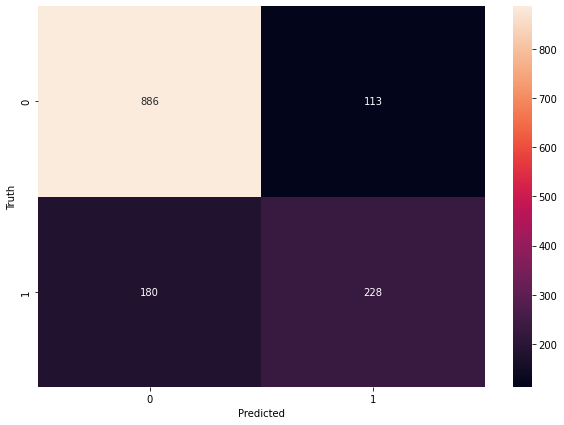

In [41]:
# Confusion matrix
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_round)

plt.figure(figsize =(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Anything in the diagonal is correctly predicted. Anything out of the diagonal are incorrectly predicted.

Accuracy is often the base measure of model performance. It describes the correct predictions of a model compared to all predictions as a ratio.

In [42]:
# Accuracy
round((886+227)/(886+113+181+227), 2)

0.79

Precision goes one level deeper from Accuracy. It is a measure of how may positive predictions are correct out of all the data points predicted as positive.

In [43]:
# Precision for class 0
precision_0 = round(886/(886+181), 2)

In [44]:
# Precision for class 1
round(227/(227+113), 2)

0.67

Recall describes how many of the correctly classified positive data points are compared to true positive data points. 

In [45]:
# Recall for class 0
recall_0 = round(886/(886+113),2)

F1 combines both precision and recall. It describes harmonic mean of precision and recall. This represents a single weighted metric of both. If F1 value is high in a model, that indicate both accuracy and precision are high (low false positive and low false negative). 

In [46]:
# F1 score for class 0
2*((precision_0*recall_0) / (precision_0 +recall_0))

0.8589534883720931

#### **Fix for data imbalance**
There are multiple techniques to handle imbalanced datasets. We will have a look at a couple of data level approaches. There are [other levels](https://www.researchgate.net/publication/263913891_Classification_of_imbalanced_data_a_review) that we can address data imbalance such as algorithm-level, cost-sensitive, and boosting approaches. 

Each technique has its own advantages and disadvantages, therefore selecting a method is specific for the problem. Let's look at 5 methods. 

1. **Undersampling majority class** 

We are throwing aways so much of data with this approach and we will not be able to capture a singificant amount of variance of the majority class.
2. **Oversample the minority class**

We can duplicate the samples of the existing minority class. There will not be any new samples generated, but it changes the choices could be available for resampling the class.
3. **Oversample monority class using SMOTE**

We produce synthetic samples of the monority class using k-nearest neighbor method and make the number of samples equal to the majority class. We have the autonomy over selecting the oversampling strategy. Basically SMOTE selects two data points in the featues space and generates new data point lies on the line that connects the two data points.
4. **Ensemble method**

We take batches from both classes and perform multiple classifications, then get the majority vote to classify the input into classes.
5. **Focal loss**

Penalize the majority class and give more weight to the minority class to get similar effects from both classes to the model.


We will explore the first four methods above.

In [47]:
# Class counts
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class 
df_class_0 = df2[df2['Churn'] == 0]
df_class_1= df2[df2['Churn'] == 1]

In [48]:
# Count the data points in classes
count_class_0, count_class_1

(5163, 1869)

In [49]:
# Shapes of data in both classes
df_class_0.shape, df_class_1.shape 

((5163, 27), (1869, 27))

Class 1 has significantly less number of samples. Let's undersample the class 0.

In [50]:
# Undersample class 0 to match the number of data points in class 0 using pandas sample function
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under, df_class_1], axis = 0)

In [51]:
# Count the data points in classes
df_test_under.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [52]:
# Separate independent, depandent variables and divded train and test samples
x = df_test_under.drop('Churn',axis= 'columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y) 

y_train consists of equal numbers of samples from both classes because of the 'stratify' argument used during the train test split.

In [53]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [54]:
y_train.shape, y_test.shape

((2990,), (748,))

In [55]:
x_train.shape, x_test.shape

((2990, 26), (748, 26))

Build a neural network function that can take the class weights into account during training, and returns prediction output, training and evaluation results, and classification report. A parameter called 'weight' is added to represent the class weight.

In [56]:
def ANN(x_train, y_train, x_test, y_test, loss, weights):
  model = keras.Sequential([
    keras.layers.Dense(26, input_dim= 26, activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
      ])

  model.compile(optimizer='adam',
              loss=loss,
              metrics= ['accuracy'])
  # If class weight is -1, do not consider that parameter during model training
  if weights == -1:
    model.fit(x_train, y_train, epochs= 100)
  else:
    model.fit(x_train, y_train, epochs = 100, class_weight= weights)

  print(model.evaluate(x_test, y_test))

  y_pred = model.predict(x_test)
  y_pred = np.round(y_pred)

  print("Classification report: \n", classification_report(y_test, y_pred))

  return y_pred

In [57]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 3ms/step - loss: 0.6532 - accuracy: 0.6050
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5434 - accuracy: 0.7478
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5079 - accuracy: 0.7565
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4955 - accuracy: 0.7652
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4888 - accuracy: 0.7662
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4854 - accuracy: 0.7669
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4820 - accuracy: 0.7652
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4792 - accuracy: 0.7652
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4784 - accuracy: 0.7736
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4760 - accuracy: 0.7759
Epoch 11/

Now the F1 score for class 1 is improved to 0.74 (from 0.61). Pretty good for class 1. For class 0, F1 score is reduced from 0.85 to 0.73, which is ok, because we are trying to treat both classes equally here.

**Oversampling**

In [58]:
count_class_0, count_class_1

(5163, 1869)

In [59]:
# Duplicate and increase the data points of class 1
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_1_over.shape

(5163, 27)

In [60]:
# Create a new dataframe with the oversampled data
df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)
print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [61]:
# Divide independent variables and dependent variable and split train and test data
x = df_test_over.drop('Churn', axis = 'columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)

In [62]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [63]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 4ms/step - loss: 0.5499 - accuracy: 0.7276
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4932 - accuracy: 0.7592
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4861 - accuracy: 0.7599
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4805 - accuracy: 0.7650
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4761 - accuracy: 0.7639
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4719 - accuracy: 0.7707
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4695 - accuracy: 0.7720
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4657 - accuracy: 0.7743
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4645 - accuracy: 0.7737
Epoch 10/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4613 - accura

As a result of oversampling, the F1 score for class 1 is improved to 0.80 from 0.61.

**SMOTE**

Let's oversample the minority class by producing synthetic samples. [SMOTE](https://www.jair.org/index.php/jair/article/view/10302) creates new data points in the feature space. A data point from minority class is taken and introduces new data points along the lines that join the selected data point and and its k nearest neighbors (k is defined by the user). The exact location along the line is defined by multiplying the distance between two data points with a randomly selected number between 0 and 1.  

In [64]:
x= df2.drop('Churn', axis= 'columns')
y = df2['Churn']

In [65]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [66]:
from imblearn.over_sampling import SMOTE

# Resample only the monority class
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [68]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [69]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [70]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 3ms/step - loss: 0.5253 - accuracy: 0.7488
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4668 - accuracy: 0.7769
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4567 - accuracy: 0.7823
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4525 - accuracy: 0.7852
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4471 - accuracy: 0.7874
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4430 - accuracy: 0.7914
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4395 - accuracy: 0.7958
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4367 - accuracy: 0.7987
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4327 - accuracy: 0.7969
Epoch 10/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4293 - accura

Now the F1 score for class 1 is increased to  0.82 from 0.61. This is slightly better than oversampling. SMOTE may capture the variance of the class 1 better than oversampling.

**Ensemble with Undersampling**

In [71]:
# Number of samples of each class
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [72]:
x= df2.drop('Churn', axis= 'columns')
y = df2['Churn']

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)

In [74]:
# Count of data from two classes in training dependent variable
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [75]:
# Minority class length somewhat close to 1/3 of majority class length
4130/3

1376.6666666666667

In [76]:
# Create a dataframe with x_train and y_train
df3 = x_train.copy()
df3['Churn'] = y_train

In [77]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [78]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [79]:
# Function to get a sample of majority class match with the length of the minority class
def get_train_batch(df_majority, df_minority, start, end):
  df_train = pd.concat([df_majority[:1495], df_minority], axis=0)
  
  x_train = df_train.drop('Churn', axis='columns')
  y_train = df_train.Churn

  return x_train, y_train

Run the model 3 times with minority class and 3 subsets of majority class.

In [80]:
x_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6359 - accuracy: 0.6462
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5278 - accuracy: 0.7535
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4979 - accuracy: 0.7632
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4904 - accuracy: 0.7656
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4855 - accuracy: 0.7692
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4823 - accuracy: 0.7682
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4798 - accuracy: 0.7672
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4779 - accuracy: 0.7686
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4774 - accuracy: 0.7729
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4738 - accuracy: 0.7753
Epoch 11/

In [81]:
x_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 5ms/step - loss: 0.6031 - accuracy: 0.6866
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5201 - accuracy: 0.7562
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5013 - accuracy: 0.7605
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4919 - accuracy: 0.7672
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4864 - accuracy: 0.7699
Epoch 6/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4849 - accuracy: 0.7709
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4821 - accuracy: 0.7739
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4793 - accuracy: 0.7739
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4779 - accuracy: 0.7739
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4754 - accuracy: 0.7739
Epoch 11/

In [82]:
x_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6419 - accuracy: 0.6716
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5278 - accuracy: 0.7619
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5008 - accuracy: 0.7635
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4925 - accuracy: 0.7662
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4917 - accuracy: 0.7615
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4860 - accuracy: 0.7692
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4836 - accuracy: 0.7696
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4806 - accuracy: 0.7709
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4805 - accuracy: 0.7699
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4789 - accuracy: 0.7729
Epoch 11/

In [84]:
# Function to get the majority vote
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
  n_one = y_pred1[i] + y_pred2[i] + y_pred3[i]
  if n_one > 1:
    y_pred_final[i] = 1
  else:
    y_pred_final[i] = 0


In [85]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.78      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.75      1407



F1 score for class 1 is not improved by this approach. 

Reference:
- [Gentle Introduction to the Adam Optimization Algorithm for Deep Learning](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)
- [Classification of imbalanced data: a review](https://www.researchgate.net/publication/263913891_Classification_of_imbalanced_data_a_review)
- [SMOTE: Synthetic Minority Over-Sampling Technique](https://www.jair.org/index.php/jair/article/view/10302)